# Simple Linear Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# for OLS method
import statsmodels.api as sm

#the actual regression (machine learning) module
from sklearn.linear_model import LinearRegression

ModuleNotFoundError: No module named 'statsmodels'

## Load the data

In [8]:
# Load the data from a .csv 
data = pd.read_csv(r'D:\DataSoCool\1. ML1 Math and SLR\Simple_linear_regression.csv')

In [9]:
data

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83
...,...,...
79,1936,3.71
80,1810,3.71
81,1987,3.73
82,1962,3.76


In [10]:
data.describe()

,SAT,GPA
count,84.000000,84.000000
mean,1845.273810,3.330238
std,104.530661,0.271617
min,1634.000000,2.400000
25%,1772.000000,3.190000
50%,1846.000000,3.380000
75%,1934.000000,3.502500
max,2050.000000,3.810000


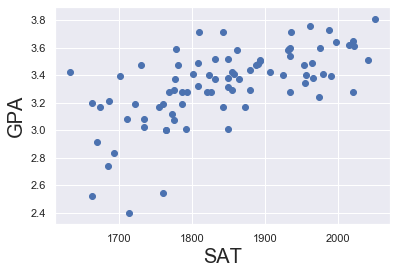

In [13]:
# Plot a scatter plot (first we put the horizontal axis, then the vertical axis)
plt.scatter(data['SAT'],data['GPA'])
# Name the axes
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
# Show the plot
plt.show()

## Define the dependent and the independent variables

In [11]:
# Following the regression equation, our dependent variable (y) is the GPA
y = data['GPA']
# Similarly, our independent variable (x) is the SAT score
x1 = data['SAT']

## Create Regression using OLS

In [14]:
# Add a constant. Essentially, we are adding a new column (equal in lenght to x), which consists only of 1s
x = sm.add_constant(x1)
# Fit the model, according to the OLS (ordinary least squares) method with a dependent variable y and an idependent x
results = sm.OLS(y,x).fit()

## Print summary of the regression.

In [15]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     56.05
Date:                Tue, 17 Jan 2023   Prob (F-statistic):           7.20e-11
Time:                        11:46:28   Log-Likelihood:                 12.672
No. Observations:                  84   AIC:                            -21.34
Df Residuals:                      82   BIC:                            -16.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2750      0.409      0.673      0.503      -0.538       1.088
SAT            0.0017      0.000      7.487      0.000       0.001       0.002
==============================================================================
Omnibus:                       12.839   Durbin-Watson:                   0.950
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.155
Skew:                          -0.722   Prob(JB):                     0.000310
Kurtosis:                       4.590   Cond. No.                     3.29e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

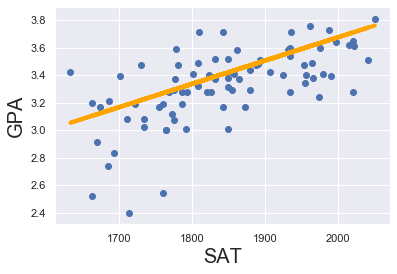

In [18]:
# Create a scatter plot
plt.scatter(x1,y)

# Define the regression equation, so we can plot it later
yhat = 0.0017*x1 + 0.275

# Plot the regression line against the independent variable (SAT) , lw - line width
fig = plt.plot(x1,yhat, lw=4, c='orange')
# Label the axes
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
plt.show()

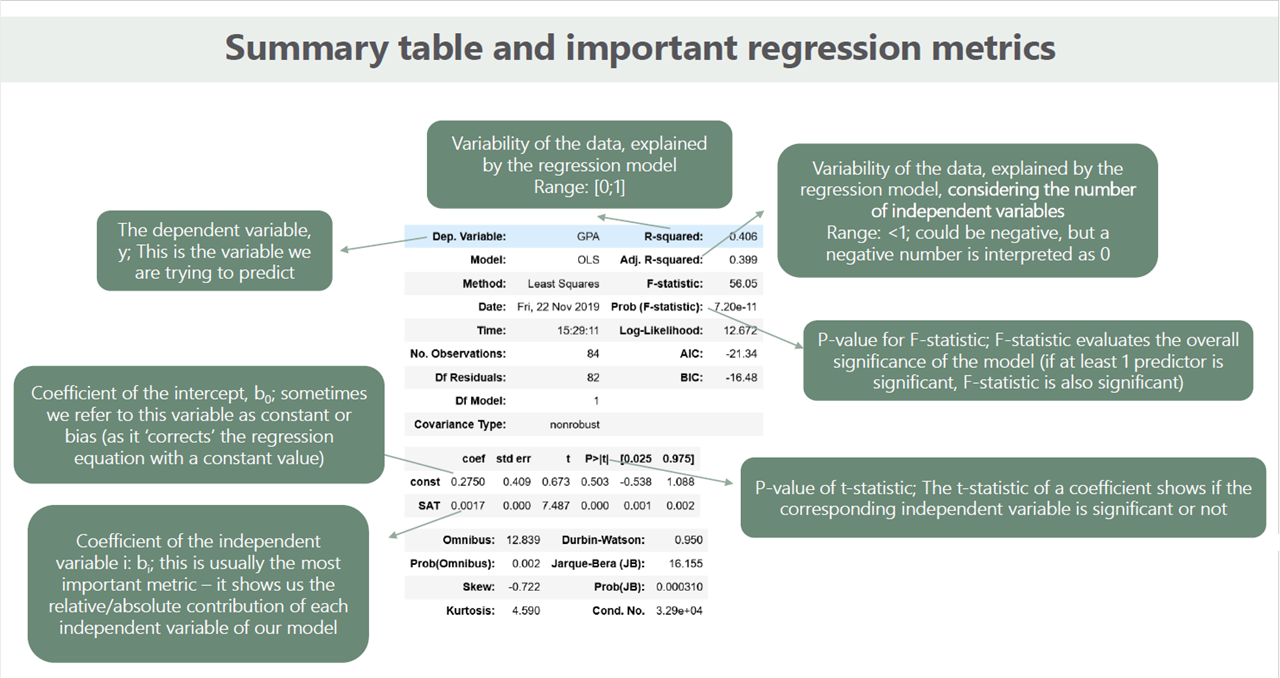

## Create Regression using sklearn library

In [28]:
# There is a single independent variable: 'SAT'
x2 = data[['SAT']]
# and a single depended variable: 'GPA'
y2 = data['GPA']

In [29]:
# We start by creating a linear regression object
reg = LinearRegression()

In [30]:
# First argument is the independent variable, while the second - the dependent (unlike with StatsModels)
reg.fit(x2,y2)

LinearRegression()

In [31]:
# Getting the coefficients of the regression
reg.coef_

array([0.00165569])

In [34]:
# we want to predict values
predicted = reg.predict(x2)
predicted

array([3.11288962, 3.03010522, 3.18905127, 3.06487466, 3.07812017,
       3.04003934, 3.19567402, 3.19567402, 3.24203329, 3.33806319,
       3.14765907, 3.21388659, 3.14765907, 3.10957824, 3.21057521,
       3.37448833, 3.18077283, 3.0466621 , 3.32481769, 3.23209916,
       3.19070696, 3.12613512, 3.02844953, 3.06818604, 3.54336851,
       3.29832668, 3.23375485, 3.29004824, 3.61953016, 3.24534466,
       3.20395246, 3.47714099, 3.21388659, 3.34634163, 3.38773383,
       3.3364075 , 3.26852429, 3.51025475, 3.21719796, 3.30660512,
       3.36289851, 3.33806319, 3.53012301, 3.09302136, 3.56985952,
       3.4622398 , 3.2950153 , 3.51356613, 3.34965301, 3.55164695,
       3.25859017, 3.34634163, 3.43243741, 2.98043457, 3.38607815,
       3.39932365, 3.13938063, 3.50859906, 3.22382072, 3.4059464 ,
       3.52681163, 3.26852429, 3.40925778, 3.65429961, 3.40925778,
       3.30826081, 3.33806319, 3.47714099, 3.35627576, 3.47217392,
       3.4754853 , 3.21885365, 3.5450242 , 3.47714099, 3.62118

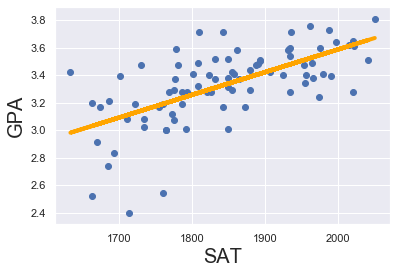

In [33]:
# There are different ways to plot the data - here's the matplotlib code
plt.scatter(x2,y2)

# Parametrized version of the regression line
yhat = reg.coef_*x2 + reg.intercept_

# Non-parametrized version of the regression line
#yhat = 0.0017*x + 0.275

# Plotting the regression line
fig = plt.plot(x2,yhat, lw=4, c='orange', label ='regression line')

# Labelling our axes
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
plt.show()

In [35]:
y2

0     2.40
1     2.52
2     2.54
3     2.74
4     2.83
      ... 
79    3.71
80    3.71
81    3.73
82    3.76
83    3.81
Name: GPA, Length: 84, dtype: float64

In [36]:
predicted

array([3.11288962, 3.03010522, 3.18905127, 3.06487466, 3.07812017,
       3.04003934, 3.19567402, 3.19567402, 3.24203329, 3.33806319,
       3.14765907, 3.21388659, 3.14765907, 3.10957824, 3.21057521,
       3.37448833, 3.18077283, 3.0466621 , 3.32481769, 3.23209916,
       3.19070696, 3.12613512, 3.02844953, 3.06818604, 3.54336851,
       3.29832668, 3.23375485, 3.29004824, 3.61953016, 3.24534466,
       3.20395246, 3.47714099, 3.21388659, 3.34634163, 3.38773383,
       3.3364075 , 3.26852429, 3.51025475, 3.21719796, 3.30660512,
       3.36289851, 3.33806319, 3.53012301, 3.09302136, 3.56985952,
       3.4622398 , 3.2950153 , 3.51356613, 3.34965301, 3.55164695,
       3.25859017, 3.34634163, 3.43243741, 2.98043457, 3.38607815,
       3.39932365, 3.13938063, 3.50859906, 3.22382072, 3.4059464 ,
       3.52681163, 3.26852429, 3.40925778, 3.65429961, 3.40925778,
       3.30826081, 3.33806319, 3.47714099, 3.35627576, 3.47217392,
       3.4754853 , 3.21885365, 3.5450242 , 3.47714099, 3.62118

In [59]:
# model evaluation for testing set

mae = metrics.mean_absolute_error(y2, predicted)
mse = metrics.mean_squared_error(y2, predicted)
rmse = np.sqrt(mse)
r2 = metrics.r2_score(y2, predicted)

print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
MAE is 0.15496879012561524
MSE is 0.04330086666167265
RMSE is 0.20808860291153056
R2 score is 0.40600391479679765


In [63]:
data.head()

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83


In [71]:
new_data = pd.DataFrame(data=[1714,1664,1760,1685,1693],columns=['SAT'])
new_data

,SAT
0,1714
1,1664
2,1760
3,1685
4,1693


In [72]:
new_predict=reg.predict(new_data)

In [73]:
new_data['actual']=data['GPA']
new_data['prediction']=new_predict

new_data

,SAT,actual,prediction
0,1714,2.40,3.112890
1,1664,2.52,3.030105
2,1760,2.54,3.189051
3,1685,2.74,3.064875
4,1693,2.83,3.078120


# Multiple Linear Regression

In [75]:
# Load the data from a .csv in the same folder
data = pd.read_csv(r'D:\DataSoCool\2. ML2 MLR and conversions\Multiple_linear_regression.csv')

In [76]:
data

,SAT,GPA,"Rand 1,2,3"
0,1714,2.40,1
1,1664,2.52,3
2,1760,2.54,3
3,1685,2.74,3
4,1693,2.83,2
...,...,...,...
79,1936,3.71,3
80,1810,3.71,1
81,1987,3.73,3
82,1962,3.76,1


## Regression using OLS

In [78]:
# Following the regression equation, our dependent variable (y) is the GPA
y = data ['GPA']
# Similarly, our independent variables (x1) is the SAT score and Rand 1,2,3
x1 = data [['SAT','Rand 1,2,3']]

In [79]:
# Add a constant
x = sm.add_constant(x1)
# Fit the model
results = sm.OLS(y,x).fit()

In [80]:
# Print summary of the regression.
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.407
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     27.76
Date:                Tue, 17 Jan 2023   Prob (F-statistic):           6.58e-10
Time:                        13:11:16   Log-Likelihood:                 12.720
No. Observations:                  84   AIC:                            -19.44
Df Residuals:                      81   BIC:                            -12.15
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2960      0.417      0.710      0.480      -0.533       1.125
SAT            0.0017      0.000      7.432      0.000       0.001       0.002
Rand 1,2,3    -0.0083      0.027     -0.304      0.762      -0.062       0.046
==============================================================================
Omnibus:                       12.992   Durbin-Watson:                   0.948
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.364
Skew:                          -0.731   Prob(JB):                     0.000280
Kurtosis:                       4.594   Cond. No.                     3.33e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.33e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

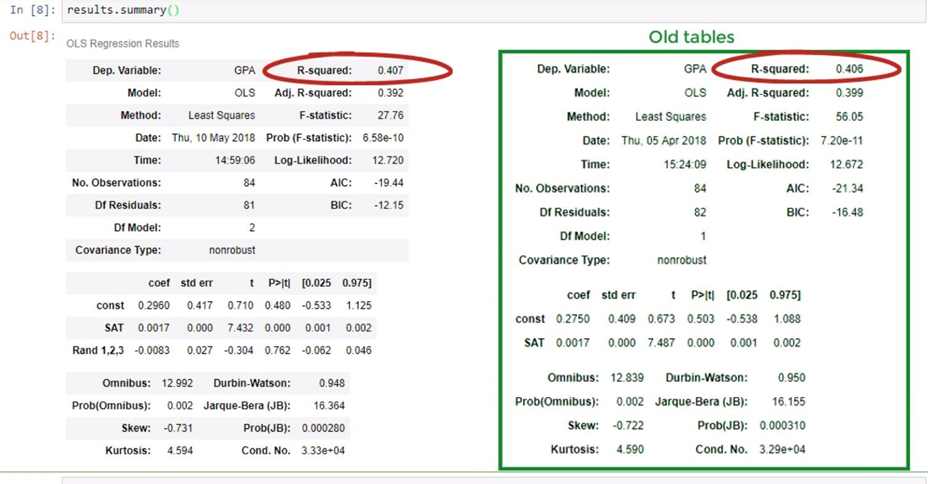

# Let us input our another independent variable.

In [93]:
# add new variable random numbers from 200 till 5000
new_variable = np.random.randint(300,5000,size=len(data))
new_column = pd.DataFrame(new_variable, columns=['Income'])

new_column


,Income
0,2879
1,4000
2,4036
3,2982
4,3845
...,...
79,4870
80,470
81,1442
82,479


In [94]:
data["Income"]= new_column
data

,SAT,GPA,"Rand 1,2,3",Income
0,1714,2.40,1,2879
1,1664,2.52,3,4000
2,1760,2.54,3,4036
3,1685,2.74,3,2982
4,1693,2.83,2,3845
...,...,...,...,...
79,1936,3.71,3,4870
80,1810,3.71,1,470
81,1987,3.73,3,1442
82,1962,3.76,1,479


In [95]:
data.describe()

,SAT,GPA,"Rand 1,2,3",Income
count,84.000000,84.000000,84.000000,84.000000
mean,1845.273810,3.330238,2.059524,2507.154762
std,104.530661,0.271617,0.855192,1333.222742
min,1634.000000,2.400000,1.000000,327.000000
25%,1772.000000,3.190000,1.000000,1440.500000
50%,1846.000000,3.380000,2.000000,2468.000000
75%,1934.000000,3.502500,3.000000,3853.250000
max,2050.000000,3.810000,3.000000,4956.000000


In [96]:
# Our dependent variable (y) is the GPA
y = data ['GPA']
# Our independent variables (x) are the SAT score and Income
x2 = data [['SAT','Income']]

In [97]:
# Add a constant.
x = sm.add_constant(x2)
# Fit the model
results = sm.OLS(y,x).fit()

In [98]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.440
Model:                            OLS   Adj. R-squared:                  0.427
Method:                 Least Squares   F-statistic:                     31.89
Date:                Tue, 17 Jan 2023   Prob (F-statistic):           6.11e-11
Time:                        13:18:11   Log-Likelihood:                 15.184
No. Observations:                  84   AIC:                            -24.37
Df Residuals:                      81   BIC:                            -17.08
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5015      0.412      1.218      0.227      -0.318       1.321
SAT            0.0016      0.000      7.261      0.000       0.001       0.002
Income     -3.824e-05   1.71e-05     -2.235      0.028   -7.23e-05   -4.19e-06
==============================================================================
Omnibus:                       10.313   Durbin-Watson:                   1.004
Prob(Omnibus):                  0.006   Jarque-Bera (JB):               12.194
Skew:                          -0.611   Prob(JB):                      0.00225
Kurtosis:                       4.410   Cond. No.                     6.05e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.05e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

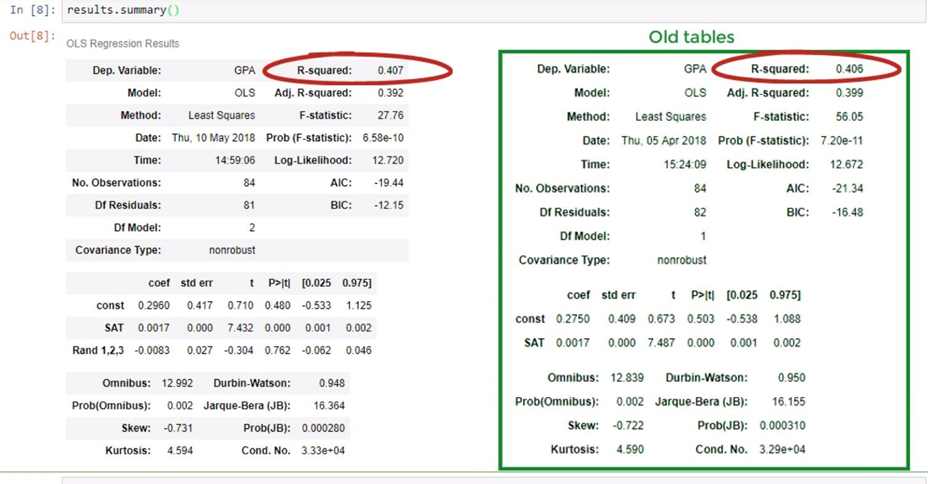

## Regression using sklearn library

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
import seaborn as sns
sns.set()

In [103]:
boston = pd.read_excel(r'housing data.xltx')

In [54]:
boston
#CRIM - per capita crime rate by town
#ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
#INDUS - proportion of non-retail business acres per town.
#CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
#NOX - nitric oxides concentration (parts per 10 million)
#RM - average number of rooms
#AGE - proportion of owner-occupied units built prior to 1940
#DIS - weighted distances to five Boston employment centres
#RAD - index of accessibility to radial highways
#TAX - full-value property-tax rate per $10,000
#PTRATIO - pupil-teacher ratio by town
#B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
#LSTAT - % lower status of the population
#MEDV - Median value of house price in $1000's
# We want to predict the median value of a home using status of the population and average number of rooms

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


### Show Descriptive Statisctics

In [55]:
boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Show Missing Values

In [56]:
boston.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [57]:
boston.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


### Show Correlation

In [58]:
boston.corr()['medv']
# keep only 65% above correlations

crim      -0.388305
zn         0.360445
indus     -0.483725
chas       0.175260
nox       -0.427321
rm         0.695360
age       -0.376955
dis        0.249929
rad       -0.381626
tax       -0.468536
ptratio   -0.507787
b          0.333461
lstat     -0.737663
medv       1.000000
Name: medv, dtype: float64

<Axes: >

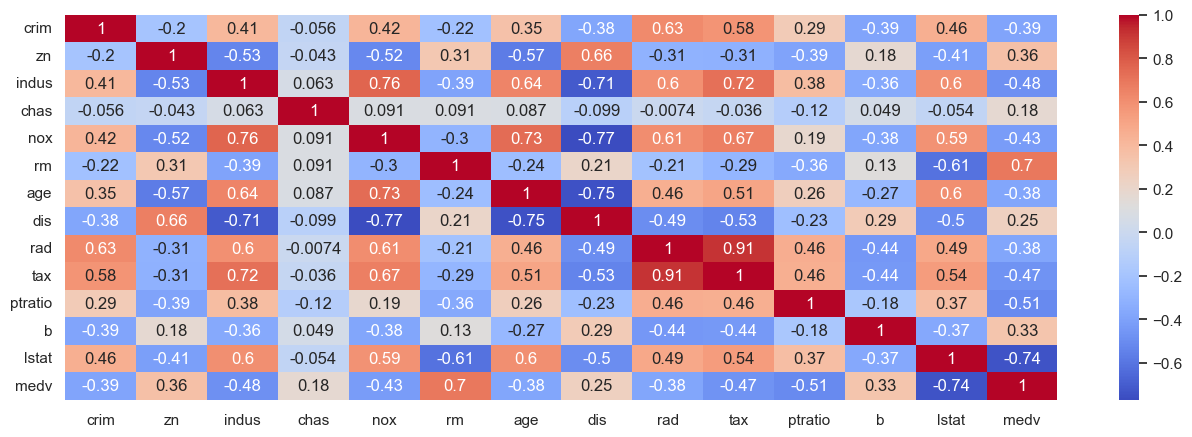

In [59]:
plt.figure(figsize = (16,5))

sns.heatmap(boston.corr(),cmap='coolwarm',annot=True)

### After corr decided to keep variables below

In [97]:
boston = boston[['rm','lstat','medv']]

In [61]:
boston

,rm,lstat,medv
0,6.575,4.98,24.0
1,6.421,9.14,21.6
2,7.185,4.03,34.7
3,6.998,2.94,33.4
4,7.147,5.33,36.2
...,...,...,...
501,6.593,9.67,22.4
502,6.120,9.08,20.6
503,6.976,5.64,23.9
504,6.794,6.48,22.0


### Detect Outliers

<Axes: xlabel='lstat'>

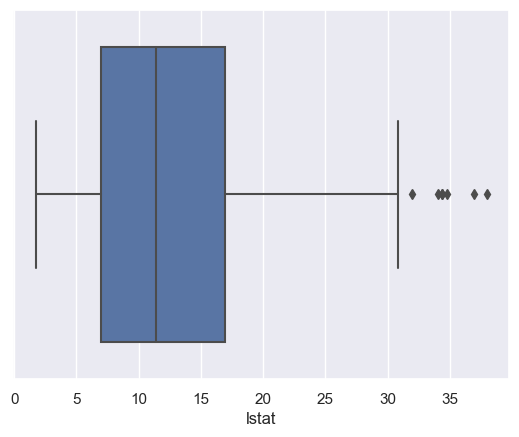

In [62]:
sns.boxplot(data=boston,x=boston['lstat'])

<Axes: xlabel='rm'>

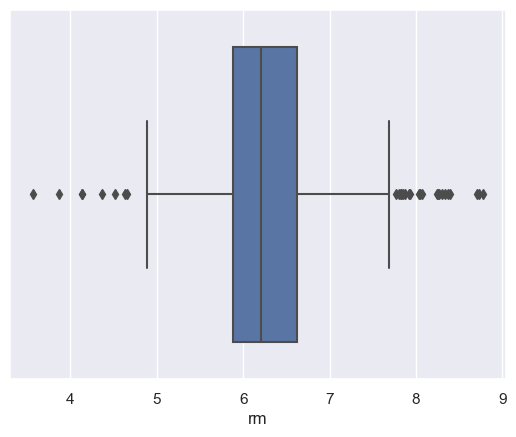

In [63]:
sns.boxplot(data=boston,x=boston['rm'])

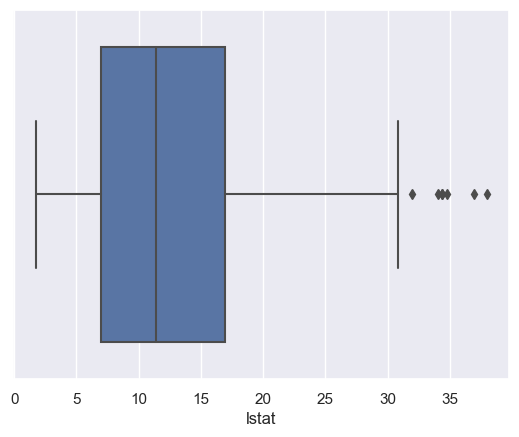

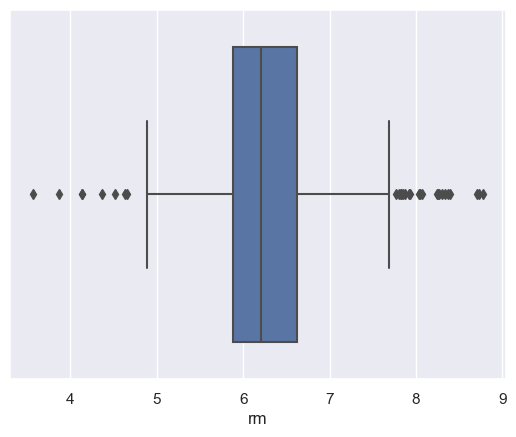

In [64]:
for i in boston[['lstat','rm']]:
    sns.boxplot(data=boston, x=boston[i])
    plt.show()

### Outlier Rule

In [89]:
q1=boston.quantile(0.25)
q3=boston.quantile(0.75)
IQR=q3-q1

Lower = q1-1.5*IQR
Upper = q3+1.5*IQR

In [90]:
Lower

rm        5.235125
lstat    -3.227500
medv     10.400000
dtype: float64

In [91]:
Upper

rm        7.184125
lstat    25.972500
medv     32.000000
dtype: float64

### Drop Outliers

In [92]:
# apply to lstat variable
boston=boston[boston['lstat']<Upper['lstat']]

# apply to rm variable
boston=boston[((boston['rm']>Lower['rm']) & (boston['rm']<Upper['rm']))]

<Axes: xlabel='rm'>

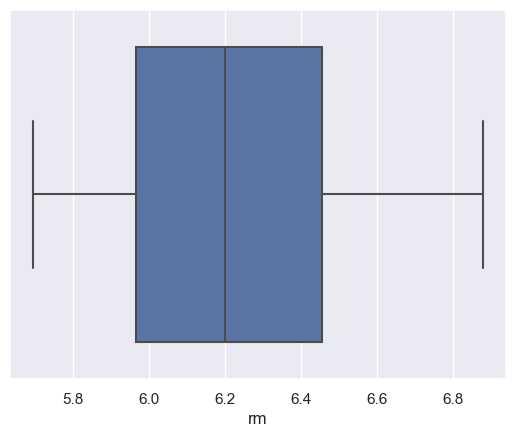

In [93]:
sns.boxplot(data=boston,x=boston['rm'])

<Axes: xlabel='lstat'>

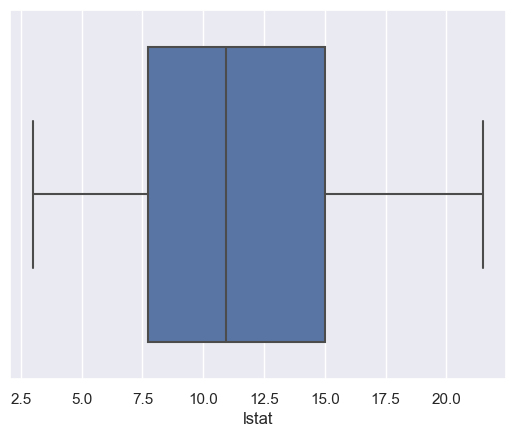

In [94]:
sns.boxplot(data=boston,x=boston['lstat'])

### Cap outliers

In [104]:
boston_capped = boston.copy()

<Axes: xlabel='lstat'>

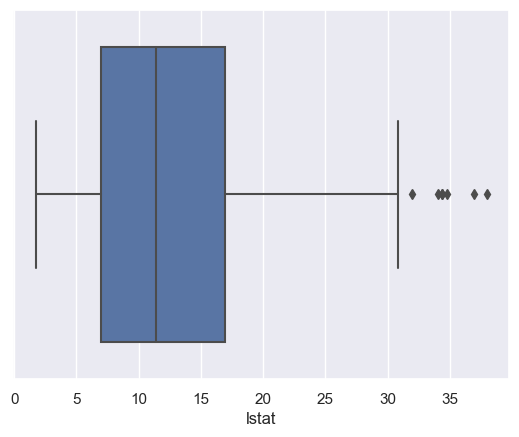

In [105]:
sns.boxplot(data=boston_capped,x=boston_capped['lstat'])

In [106]:
boston_capped['lstat'] = np.where(boston_capped['lstat'] > Upper['lstat'],
                                  Upper['lstat'],boston_capped['lstat'])

<Axes: xlabel='lstat'>

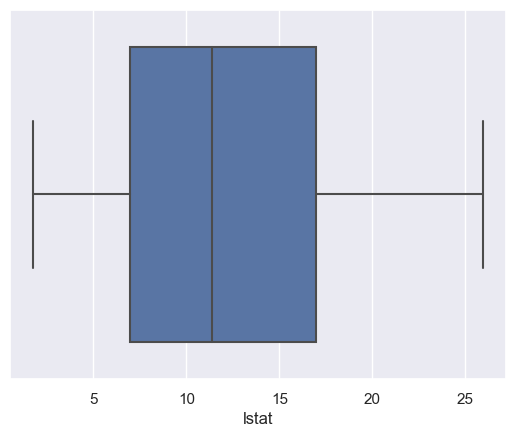

In [107]:
sns.boxplot(data=boston_capped,x=boston_capped['lstat'])

<Axes: xlabel='rm'>

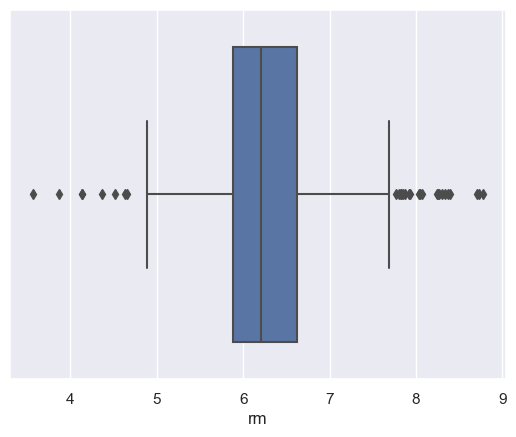

In [108]:
sns.boxplot(data=boston_capped,x=boston_capped['rm'])

In [109]:
boston_capped['rm'] = np.where(boston_capped['rm'] > Upper['rm'],
                               Upper['rm'],
                               (np.where(boston_capped['rm'] < Lower['rm'],
                               Lower['rm'],boston_capped['rm'])))

<Axes: xlabel='rm'>

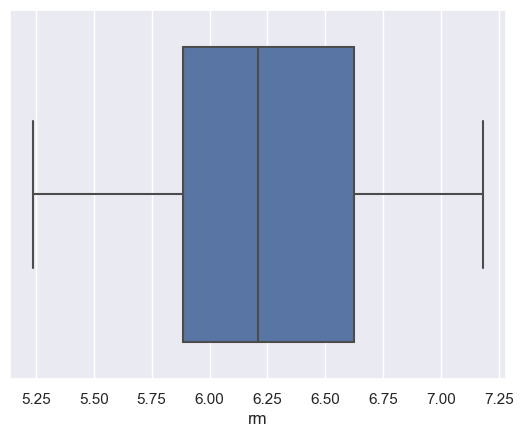

In [110]:
sns.boxplot(data=boston_capped,x=boston_capped['rm'])

In [111]:
boston = boston_capped.copy()
boston

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575000,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421000,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.184125,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998000,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147000,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593000,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120000,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976000,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794000,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


## select dependent and independent variables

In [112]:
x = boston[['lstat','rm']]
y = boston['medv']

In [113]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

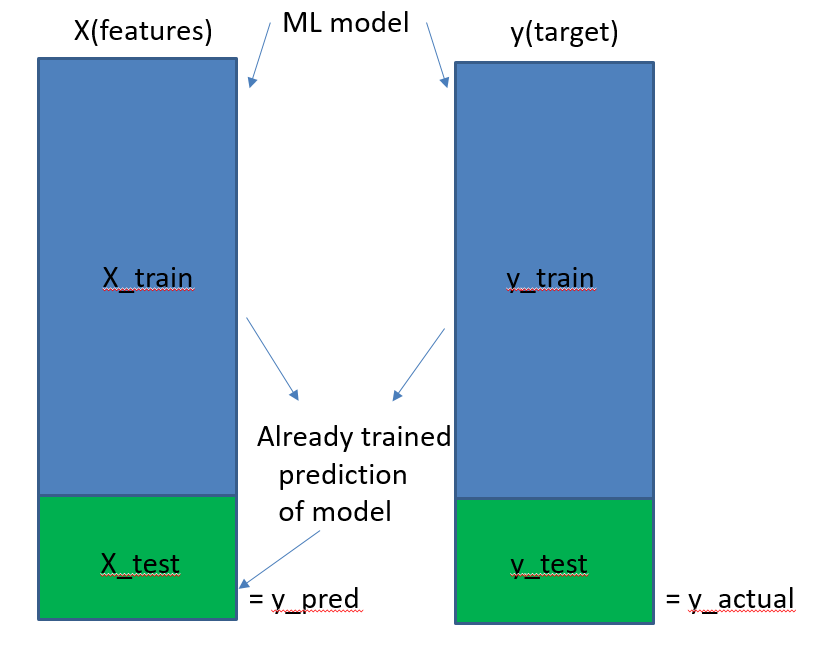

### Build Model

In [114]:
reg = LinearRegression()

### Train the model

In [115]:
reg.fit(X_train, y_train)

LinearRegression()

### Evaluate the model

In [116]:
y_pred = reg.predict(X_test)

In [117]:
y_pred

array([26.11106701, 32.42180567, 16.48378309, 26.94861936, 18.88264223,
       23.00687843, 15.88951748, 12.70003887, 22.00896416, 19.7121103 ,
       16.42388936, 17.37485291,  5.98934667, 22.44830897, 19.98773587,
       27.18562767, 16.29112148,  5.98934667, 35.2581976 , 17.56888415,
       27.07711089, 27.95606408, 11.35812395, 26.60154625, 18.50215817,
       13.30960751, 23.02338363, 20.15196441, 16.99255035, 18.5886682 ,
       16.87321175, 27.63401147, 26.91145302, 19.28283573, 14.00503591,
       16.76466102, 34.41315946, 22.43729668, 19.6565499 , 26.3478083 ,
       10.71047265, 29.74336343, 35.32994612, 18.2721298 , 26.30003292,
       15.73478371, 14.67894556, 27.96619302, 18.93478834, 30.23948692,
       20.45619397, 32.7545696 , 16.85736375, 29.25037109, 35.1067285 ,
       24.30007765, 18.98727283, 33.1589307 , 25.49725596, 14.05282912,
       27.68492146, 33.79133895, 31.08308061, 18.61423369, 29.85534629,
        8.89792663, 19.97811623, 27.32120617, 30.87781436, 15.69

In [118]:
X_test['actual'] = y_test
X_test['predicted'] = y_pred

X_test

,lstat,rm,actual,predicted
173,9.0400,6.416000,23.6,26.111067
274,3.5300,6.758000,32.4,32.421806
491,18.0700,5.983000,13.6,16.483783
72,5.5200,6.065000,22.8,26.948619
452,17.2700,6.297000,16.1,18.882642
...,...,...,...,...
412,25.9725,5.235125,17.9,5.989347
436,18.0500,6.461000,9.6,19.180629
411,21.2200,6.657000,17.2,17.752769
86,12.8600,6.015000,22.5,20.816700


In [119]:
# model evaluation for testing set

mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = metrics.r2_score(y_test, y_pred)

print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
MAE is 3.814351376714692
MSE is 28.933461411883236
RMSE is 5.378983306525801
R2 score is 0.6054552190682887


## Deployment

In [120]:
#Independent features

#RM - average number of rooms
#LSTAT - % lower status of the population


In [121]:
boston

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575000,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421000,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.184125,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998000,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147000,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593000,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120000,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976000,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794000,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [137]:
new_df = pd.DataFrame({
    'lstat':[9.14,3.1,3.6,2.7,4.2],
    'rm':[2.54,8.65,4.67,5.13,9.23]
    })
new_df

,lstat,rm
0,9.14,2.54
1,3.10,8.65
2,3.60,4.67
3,2.70,5.13
4,4.20,9.23


In [138]:
new_pred = reg.predict(new_df)

In [139]:
new_df['prediction'] = new_pred

new_df

,lstat,rm,prediction
0,9.14,2.54,4.292486
1,3.10,8.65,43.376040
2,3.60,4.67,20.655284
3,2.70,5.13,23.952716
4,4.20,9.23,45.752091


## Evaluation

In [130]:
# sahede insan sayi faizle
# evde olan otaqlarin orta sayi

boston.corr()['medv']

crim      -0.388305
zn         0.360445
indus     -0.483725
chas       0.175260
nox       -0.427321
rm         0.664628
age       -0.376955
dis        0.249929
rad       -0.381626
tax       -0.468536
ptratio   -0.507787
b          0.333461
lstat     -0.761184
medv       1.000000
Name: medv, dtype: float64

In [140]:
new_df

,lstat,rm,prediction
0,9.14,2.54,4.292486
1,3.10,8.65,43.376040
2,3.60,4.67,20.655284
3,2.70,5.13,23.952716
4,4.20,9.23,45.752091
